In [2]:
# import required functions and classes
import os

from sktime.datasets._data_io import _load_provided_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

import warnings
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

DATA_PATH = os.path.join(os.getcwd(),"datasets","Multivariate_ts")

### Load the data set

In [3]:
def _load_data_set(data_set_name="ArticularyWordRecognition", debugging_information=False):
    train_data = _load_provided_dataset(
        name=data_set_name,
        split="train",
        return_X_y=False,
        return_type=None,
        extract_path=DATA_PATH,
    )

    test_data = _load_provided_dataset(
        name=data_set_name,
        split="test",
        return_X_y=False,
        return_type=None,
        extract_path=DATA_PATH,
    )

    if debugging_information:
        print(f"Data set train instances: {train_data.shape[0]}")
        print(f"Train targets: {train_data.iloc[:,-1].value_counts().to_dict()}")
        train_instance_length = [
            train_data.iloc[instance, 0].shape[0] for instance in range(len(train_data))
        ]
        print(
            f"Train instance lengths: {pd.DataFrame(train_instance_length).value_counts().to_dict()}"
        )
        num_dimensions = len([col for col in train_data.columns if "dim" in col])
        print(f"The Train data has {num_dimensions} dimensions\n")

        print(f"Data set test instances: {test_data.shape[0]}")
        print(f"Test targets: {test_data.iloc[:,-1].value_counts().to_dict()}")
        test_instance_length = [
            test_data.iloc[instance, 0].shape[0] for instance in range(len(test_data))
        ]
        print(
            f"Test instance lengths: {pd.DataFrame(test_instance_length).value_counts().to_dict()}"
        )
        num_dimensions = len([col for col in test_data.columns if "dim" in col])
        print(f"The Test data has {num_dimensions} dimensions")

    return train_data, test_data

In [4]:
data_set_name = "ArticularyWordRecognition"

train_data, test_data = _load_data_set(data_set_name = data_set_name)
train_data.head(3)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,class_val
0,0 0.87159 1 0.88042 2 0.88042 3...,0 0.74530 1 0.82313 2 0.82313 3...,0 1.15330 1 1.08870 2 1.08870 3...,0 0.38622 1 0.30811 2 0.30811 3...,0 1.51560 1 1.51190 2 1.51190 3...,0 -0.71550 1 -0.72903 2 -0.72903 3...,0 0.88441 1 0.85476 2 0.85476 3...,0 1.13700 1 0.63292 2 0.63292 3...,0 1.2429 1 1.4795 2 1.4795 3 ...,1.0
1,0 2.74280 1 2.42650 2 2.42650 3...,0 1.4875 1 1.6060 2 1.6060 3 ...,0 1.19860 1 0.93703 2 0.93703 3...,0 1.3892 1 1.3780 2 1.3780 3 ...,0 2.96920 1 2.86290 2 2.86290 3...,0 -1.8594 1 -1.8413 2 -1.8413 3 ...,0 2.6193 1 2.3884 2 2.3884 3 ...,0 1.0217 1 1.1945 2 1.1945 3 ...,0 2.01640 1 0.83039 2 0.83039 3...,1.0
2,0 0.97990 1 1.00280 2 1.00280 3...,0 0.094518 1 0.181220 2 0.18122...,0 0.96637 1 0.98218 2 0.98218 3...,0 1.21560 1 1.22560 2 1.22560 3...,0 0.73842 1 0.74010 2 0.74010 3...,0 -0.54637 1 -0.59934 2 -0.59934 3...,0 0.41161 1 0.29903 2 0.29903 3...,0 0.47587 1 1.50300 2 1.50300 3...,0 0.76240 1 0.10234 2 0.10234 3...,1.0


### Visualise the multivariate timeseries data

In [5]:
def visualize_time_series(
    data_set_name, n_samples_per_class=10, max_number_classes=4, max_num_dimensions=5
):
    # Load the data
    train_data, test_data = _load_data_set(data_set_name=data_set_name)

    # Filter classes and dimensions
    classes = train_data["class_val"].unique()
    classes = (
        classes[:max_number_classes] if len(classes) > max_number_classes else classes
    )

    num_dimensions = min(
        max_num_dimensions, sum(["dim" in col for col in train_data.columns])
    )

    # Create subplots for each class and dimension
    fig, axes = plt.subplots(
        len(classes),
        num_dimensions,
        figsize=(12, 3 * len(classes)),
        sharex=True,
        sharey=True,
    )

    for i, target_class in enumerate(classes):
        # Filter the data for the current class
        class_data = train_data[train_data["class_val"] == target_class]

        if len(class_data) < n_samples_per_class:
            print(
                f"\n ATTENTION:\n len(class_data)= {len(class_data)} < n_samples_per_class {n_samples_per_class}"
            )
            n_samples_per_class = len(class_data)

        # Select n random samples from the target class
        class_samples = class_data.sample(n=n_samples_per_class)

        for dim in range(num_dimensions):
            for idx, row in class_samples.iterrows():
                # Plot the selected time series on the corresponding subplot with the same color
                axes[i][dim].plot(row[f"dim_{dim}"], color="b", alpha=0.3)

            # Calculate and plot the average line for the class (bold line)
            average_line = (
                class_samples[f"dim_{dim}"].apply(lambda x: pd.Series(x)).mean(axis=0)
            )
            axes[i][dim].plot(
                average_line, color="r", linewidth=2, label="Average", alpha=0.9
            )
            axes[i][dim].set_title(f"Target {target_class}, Dimension {dim}")

    # Adjust layout spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

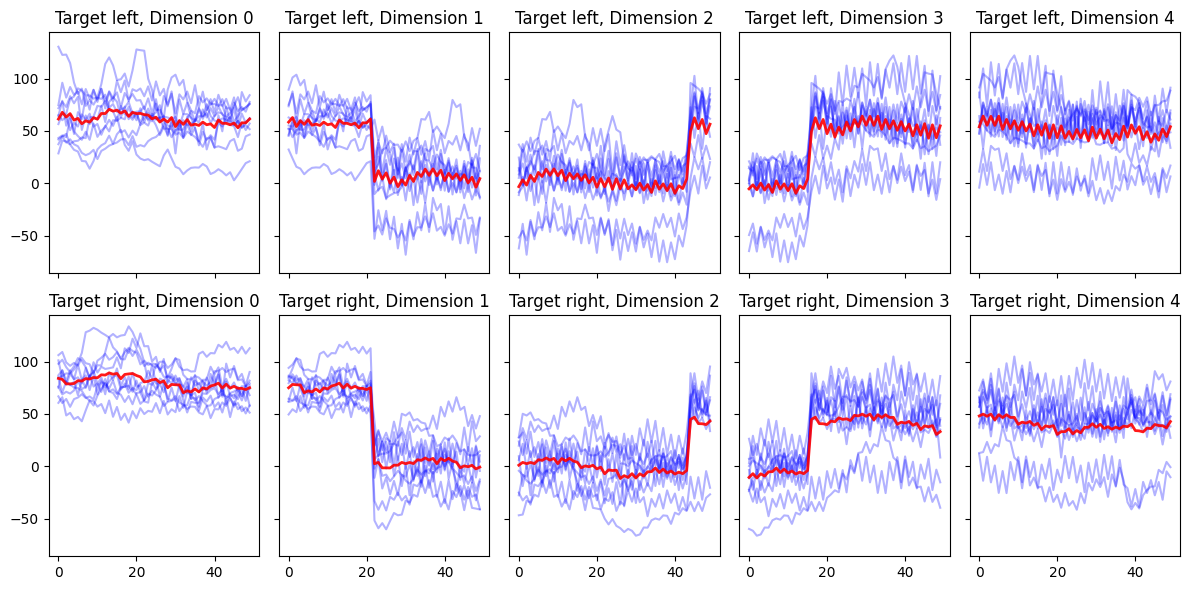

In [6]:
data_set_name="FingerMovements"

visualize_time_series(
    data_set_name=data_set_name,
    n_samples_per_class=10,
    max_number_classes=4,
    max_num_dimensions=5,
)

### calculate the descriptes master table

In [7]:
def _get_dataset_descriptives(data_set_name):
    train_data, test_data = _load_data_set(data_set_name=data_set_name)

    # count columns that contain string dim_ in train_data
    dim_count = train_data.filter(like="dim_").shape[1]

    # get the data shapes of train and test
    number_train_instances = len(train_data["dim_0"])
    length_train_instance = len(train_data["dim_0"][0])
    number_test_instances = len(test_data["dim_0"])
    length_test_instance = len(test_data["dim_0"][0])

    # get the number of target classes
    number_target_classes = len(train_data["class_val"].unique())
    
    # generate a dict with all values calculated above
    buffer_dict = {
        "dim_count": dim_count,
        "number_train_instances": number_train_instances,
        "length_train_instance": length_train_instance,
        "number_test_instances": number_test_instances,
        "length_test_instance": length_test_instance,
        "number_target_classes": number_target_classes,      
    }

    return buffer_dict

In [8]:
def _get_dataset_descriptives_master_table(just_testing=True):
    
    # result path multi variate classification
    multivariate_path = os.path.join("datasets", "Multivariate_ts")


    # List all files in the current directory
    if just_testing:
        available_data_sets = sorted(os.listdir(multivariate_path))[:3]
    else:
        available_data_sets = sorted(os.listdir(multivariate_path))
        

    # check if .DS_Store is in available_data_sets and filter it out
    if ".DS_Store" in available_data_sets:
        available_data_sets.remove(".DS_Store")
    # check if .gitignore is in available_data_sets and filter it out
    if ".gitkeep" in available_data_sets:
        available_data_sets.remove(".gitkeep")

    descriptive_dict = defaultdict(dict)

    # iterate over all available data sets in available_data_sets, extract the folder name
    for data_set_name in tqdm(available_data_sets):
        descriptive_dict[data_set_name] = _get_dataset_descriptives(data_set_name)
        
    return descriptive_dict

In [29]:
just_testing = True 

data_descriptives_master_table =_get_dataset_descriptives_master_table(just_testing=just_testing)
data_descriptives_master_table = pd.DataFrame(data_descriptives_master_table)

if not just_testing:
    data_descriptives_master_table.to_csv(
        os.path.join("datasets", "material", "own_dataset_descriptives.csv")
    )

100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


### lets calculate the performance master table

In [9]:
def _load_algorithm_performance(algorithm_name="Arsenal_ACC.csv"):
    mutlivariate_result_path = os.path.join("results", "classification", "Multivariate")

    algorithm_performance = pd.read_csv(
        os.path.join(mutlivariate_result_path, algorithm_name)
    )

    return algorithm_performance

In [10]:
def _get_performance_master_dict():
        
    # result path multi variate classification
    mutlivariate_result_path = os.path.join("results", "classification", "Multivariate")

    # List all files in the current directory
    algorithm_result = os.listdir(mutlivariate_result_path)

    performance_dict = defaultdict(dict)
    # Print the list of files
    for index_algorithm, algorithm_name in enumerate(algorithm_result):
        algorithm_performance = _load_algorithm_performance(algorithm_name=algorithm_name)
        algorithm_name = algorithm_name.rstrip(".csv")

        fold_columns = algorithm_performance.columns.drop("folds:")

        for index_data_set, row in algorithm_performance.iterrows():
            data_set_name = row["folds:"]
            
            if index_algorithm == 0: 
                performance_dict[data_set_name] = {}

            # get the raw performance for the algorithm csv and the data set row
            algorithm_data_set_performance_raw = algorithm_performance.loc[algorithm_performance["folds:"] == data_set_name][
                fold_columns
            ].values.flatten()
            
            performance_dict[data_set_name][algorithm_name] = algorithm_data_set_performance_raw

    # iterate over all data sets in performance_dict and transform the value into a pd.DataFrame
    for data_set_name, algorithm_performance in performance_dict.items():
        performance_dict[data_set_name]= pd.DataFrame(algorithm_performance)
    
    return performance_dict

In [11]:
def _calculate_descriptive_performance(algorithm_data_set_performance_raw):
    percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
    percentiles_dict = {f'quantiles_{int(p*100)}': np.quantile(algorithm_data_set_performance_raw, p) for p in percentiles}
    
    descriptive_dict = {
        'mean': np.mean(algorithm_data_set_performance_raw),
        'std': np.std(algorithm_data_set_performance_raw),
        'min_value': np.min(algorithm_data_set_performance_raw),
        'max_value': np.max(algorithm_data_set_performance_raw),
        **percentiles_dict
    }
    
    return descriptive_dict

def calculate_algorithm_descriptives(performance_dict):
    algorithm_descriptives = defaultdict(dict)
    
    for data_set, algorithms in performance_dict.items():
        for algorithm, performance_data in algorithms.items():
            descriptive_stats = _calculate_descriptive_performance(performance_data)
            algorithm_descriptives[data_set][algorithm] = descriptive_stats
            
    # iterate over all data sets in performance_dict and transform the value into a pd.DataFrame
    for data_set_name, algorithm_performance in algorithm_descriptives.items():
        algorithm_descriptives[data_set_name]= pd.DataFrame(algorithm_performance)
    
    return algorithm_descriptives


In [12]:
# check master table performance
performance_dict = _get_performance_master_dict()
performance_dict["ArticularyWordRecognition"].head(3)

,ResNet_ACC,RSF_ACC,TSF_ACC,TapNet_ACC,1NN-DTW-D_ACC,DrCIF_ACC,CIF_ACC,Arsenal_ACC,MrSEQL_ACC,ROCKET_ACC,1NN-DTW-I_ACC,HC2_ACC,1NN-DTW-A_ACC,InceptionT_ACC,STC_ACC,cBOSS_ACC,HC1_ACC,RISE_ACC,TDE_ACC,MUSE_ACC
0,0.980000,0.983333,0.953333,0.956667,0.986667,0.98,0.983333,0.993333,0.993333,0.993333,0.953333,0.993333,0.986667,0.983333,0.990000,0.990000,0.990000,0.963333,0.993333,0.993333
1,0.990000,0.983333,0.933333,0.973333,0.983333,0.98,0.983333,0.996667,0.993333,0.996667,0.960000,0.996667,0.983333,0.993333,0.986667,0.970000,0.983333,0.960000,0.976667,0.993333
2,0.983333,0.993333,0.963333,0.973333,0.993333,0.99,0.990000,0.996667,0.996667,1.000000,0.953333,0.996667,0.993333,0.993333,0.983333,0.983333,0.990000,0.983333,0.973333,0.996667


In [13]:
# calculate the descriptive statistics
algorithm_descriptives = calculate_algorithm_descriptives(performance_dict)
algorithm_descriptives['ArticularyWordRecognition'].head(3)

,ResNet_ACC,RSF_ACC,TSF_ACC,TapNet_ACC,1NN-DTW-D_ACC,DrCIF_ACC,CIF_ACC,Arsenal_ACC,MrSEQL_ACC,ROCKET_ACC,1NN-DTW-I_ACC,HC2_ACC,1NN-DTW-A_ACC,InceptionT_ACC,STC_ACC,cBOSS_ACC,HC1_ACC,RISE_ACC,TDE_ACC,MUSE_ACC
mean,0.982556,0.982111,0.948222,0.971333,0.988667,0.978778,0.978889,0.996444,0.989778,0.995556,0.943111,0.995778,0.989444,0.991000,0.975111,0.975556,0.979889,0.957333,0.977333,0.988667
std,0.006922,0.006965,0.013844,0.009836,0.005484,0.007478,0.008225,0.002713,0.004211,0.002897,0.010643,0.003095,0.004950,0.004880,0.010282,0.008089,0.007018,0.011169,0.009205,0.006061
min_value,0.966667,0.956667,0.916667,0.946667,0.976667,0.966667,0.960000,0.986667,0.980000,0.990000,0.923333,0.986667,0.976667,0.983333,0.953333,0.960000,0.966667,0.926667,0.960000,0.976667


### and visualize the performance

In [14]:
def _visualize_performance_data_set(data_set_name):
    
    performance_dict = _get_performance_master_dict()
    
    
    data_set_performance = pd.DataFrame(performance_dict[data_set_name]["performance"])
    data_set_descriptive = pd.DataFrame(
        performance_dict[data_set_name]["descriptive"], index=[0]
    )
    data_set_descriptive

    # Extract algorithm names
    algorithm_names = [
        algorithm_name.strip("_ACC") for algorithm_name in data_set_performance.columns
    ]
    data_set_performance.index = [
        "$\hat{\mu}$",
        "$\hat{\sigma}$",
        "$Q_{min}$",
        "$Q_{0.01}$",
        "$Q_{0.05}$",
        "$Q_{0.25}$",
        "$Q_{0.50}$",
        "$Q_{0.75}$",
        "$Q_{0.95}$",
        "$Q_{0.99}$",
        "$Q_{max}$",
    ]

    # Set the figure size for better visualization
    plt.figure(figsize=(10, 6))

    # Generate the heatmap
    sns.heatmap(
        data_set_performance,
        cmap="coolwarm",
        annot=True,
        fmt=".2f",
        cbar=True,
        annot_kws={"size": 7},
    )

    # Add labels and title
    plt.xlabel("Algorithm", fontsize=15)
    plt.ylabel("Descriptive Performance", fontsize=15)  # Updated y-axis label
    plt.title(f"Performance on {data_set_name} [$ACC\%$]", fontsize=20)

    # Rotate the tick labels for better readability
    plt.xticks(
        range(len(algorithm_names)), algorithm_names, rotation=45, ha="center", fontsize=10
    )
    plt.yticks(rotation=0, fontsize=10)

    # Show the plot
    plt.grid(visible=True, linestyle="--", alpha=0.7)
    plt.tight_layout()  # Ensures that labels and ticks fit within the figure area
    plt.show()

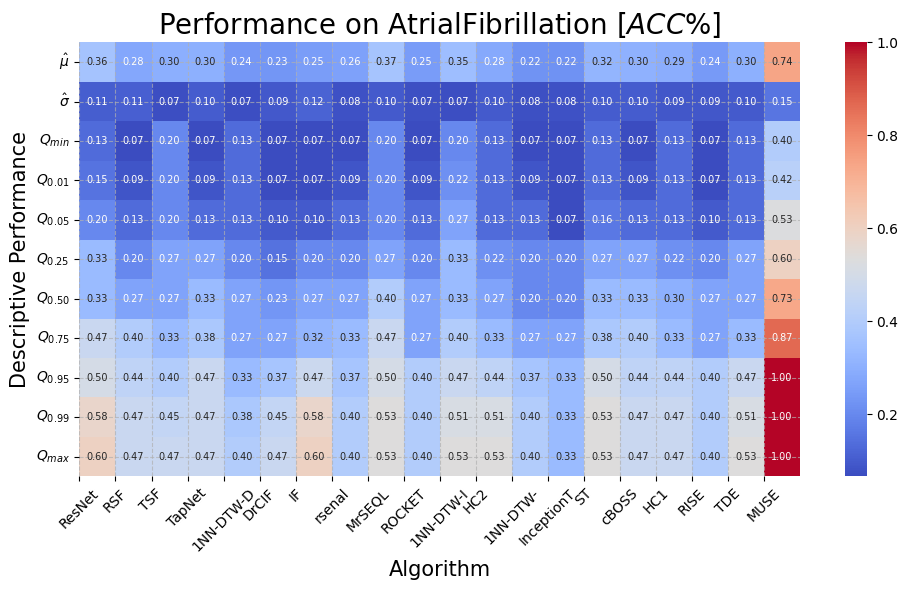

In [12]:
data_set_name = "AtrialFibrillation"
_visualize_performance_data_set(data_set_name)

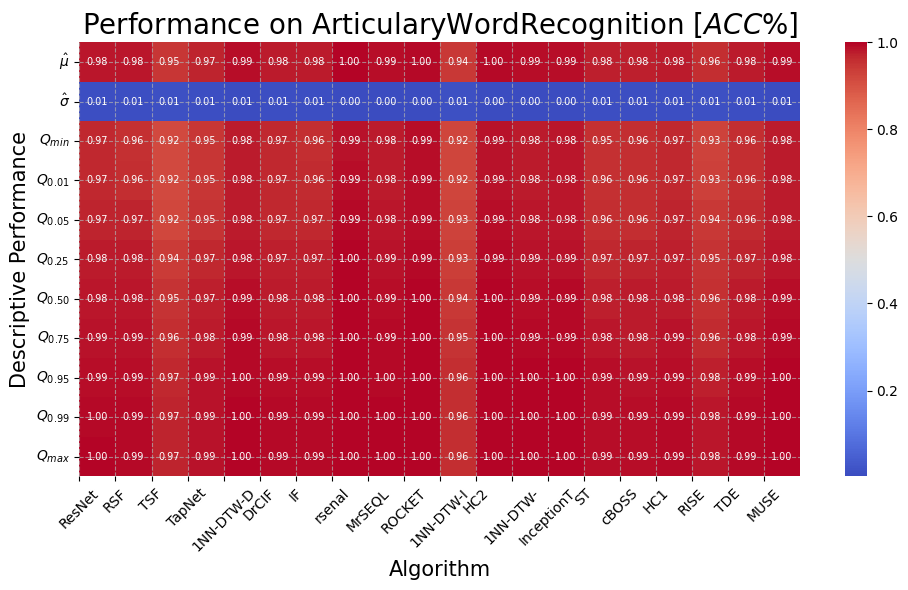

In [55]:
data_set_name = "ArticularyWordRecognition"
_visualize_performance_data_set(data_set_name)

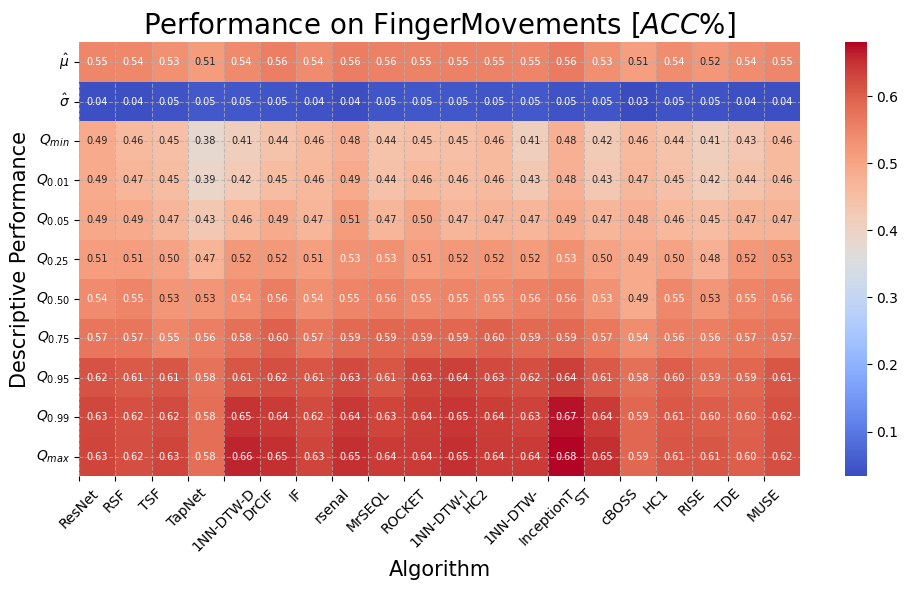

In [56]:
data_set_name = "FingerMovements"
_visualize_performance_data_set(data_set_name)

### Define ML problem: mapping from data set descriptives to algorithm performance

In [15]:
model_performance = _load_algorithm_performance(algorithm_name="Arsenal_ACC.csv")

model_performance_descriptive = {}
fold_columns = model_performance.columns.drop("folds:")

for index_data_set, row in model_performance.iterrows():
    data_set_name = row["folds:"]

    # get the raw performance for the algorithm csv and the data set row
    algorithm_data_set_performance_raw = model_performance.loc[
        model_performance["folds:"] == data_set_name
    ][fold_columns].values.flatten()

    descriptive_stats = _calculate_descriptive_performance(
        algorithm_data_set_performance_raw
    )

    model_performance_descriptive[data_set_name] = descriptive_stats

Y = pd.DataFrame(model_performance_descriptive).T
Y.head(3)

,mean,std,min_value,max_value,quantiles_1,quantiles_5,quantiles_25,quantiles_50,quantiles_75,quantiles_95,quantiles_99
ArticularyWordRecognition,0.996444,0.002713,0.986667,1.0,0.9886,0.993333,0.996667,0.996667,0.996667,1.00,1.0
AtrialFibrillation,0.260000,0.077651,0.066667,0.4,0.0860,0.133333,0.200000,0.266667,0.333333,0.37,0.4
BasicMotions,0.989167,0.012388,0.975000,1.0,0.9750,0.975000,0.975000,1.000000,1.000000,1.00,1.0


In [16]:
# Load dataset characteristics from CSV file
data_set_characteristics_path = os.path.join("datasets", "material", "own_dataset_descriptives.csv")
dataset_characteristics = pd.read_csv(data_set_characteristics_path, index_col=[0])

X = dataset_characteristics.T
X.head(3)

,dim_count,number_train_instances,length_train_instance,number_test_instances,length_test_instance,number_target_classes
ArticularyWordRecognition,9,275,144,300,144,25
AtrialFibrillation,2,15,640,15,640,3
BasicMotions,6,40,100,40,100,4


In [26]:
# inner join x and y on index
matched_data_sets = X.join(Y,how="inner")

# document how many rows were not matched
num_rows_not_matched = len(X) - len(matched_data_sets)
print(f"Number of rows not matched: {num_rows_not_matched}")

input_columns = [
    "dim_count",
    "number_train_instances",
    "length_train_instance",
    "number_test_instances",
    "length_test_instance",
    "number_target_classes",
]

target_columns = ["mean", "quantiles_50", "quantiles_75", "quantiles_95", "quantiles_99"]

Number of rows not matched: 0


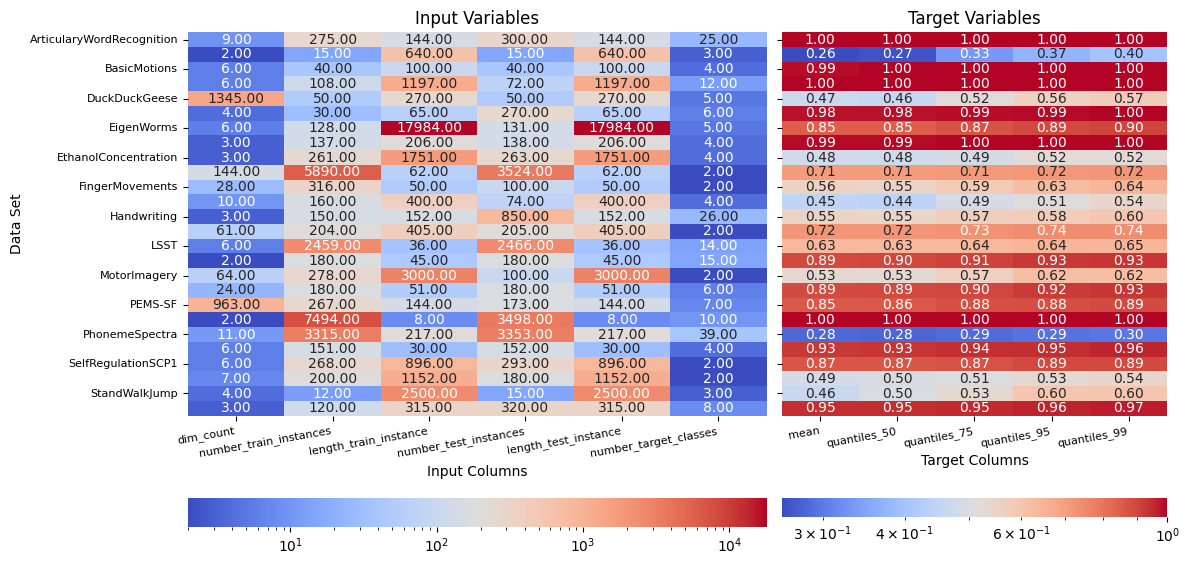

In [27]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), sharey=True, gridspec_kw={"width_ratios": [3, 2]}
)

# Plot the input columns as a heat map with a log scale for the colors
input_heatmap = sns.heatmap(
    matched_data_sets[input_columns],
    ax=axes[0],
    cmap="coolwarm",
    cbar_kws=dict(use_gridspec=True, location="bottom"),
    annot=True,
    fmt=".2f",
    xticklabels=True,
    norm=LogNorm(
        vmin=matched_data_sets[input_columns].min().min(),
        vmax=matched_data_sets[input_columns].max().max(),
    ),
)
axes[0].set_title("Input Variables")
axes[0].set_xlabel("Input Columns")
axes[0].set_ylabel("Data Set")

# Modify x and y tick labels font size
input_heatmap.tick_params(axis="both", labelsize=8)

# Rotate x-axis tick labels by 20 degrees
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10, ha="right")

# Plot the target columns as a heat map with a log scale for the colors
target_heatmap = sns.heatmap(
    matched_data_sets[target_columns],
    ax=axes[1],
    cmap="coolwarm",
    cbar_kws=dict(use_gridspec=True, location="bottom"),
    annot=True,
    fmt=".2f",
    xticklabels=True,
    norm=LogNorm(
        vmin=matched_data_sets[target_columns].min().min(),
        vmax=matched_data_sets[target_columns].max().max(),
    ),
)
axes[1].set_title("Target Variables")
axes[1].set_xlabel("Target Columns")

# Modify x and y tick labels font size
target_heatmap.tick_params(axis="both", labelsize=8)

# Rotate x-axis tick labels by 20 degrees
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=10, ha="right")

plt.tight_layout()
plt.show()

## train a basic model

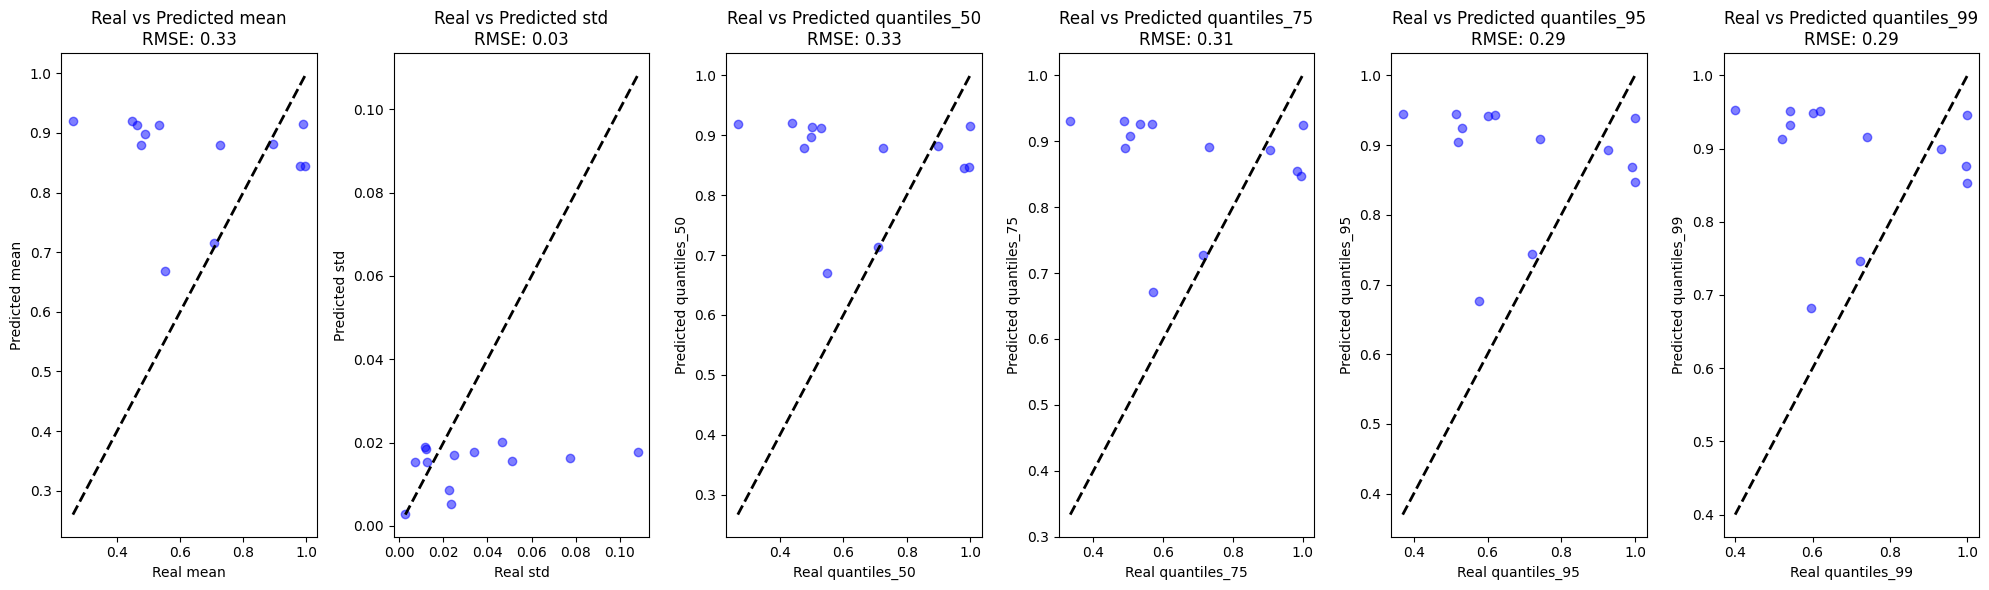

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

input_columns = [
    "dim_count",
    "number_train_instances",
    "length_train_instance",
    "number_test_instances",
    "length_test_instance",
    "number_target_classes",
]

target_columns = ["mean","std", "quantiles_50", "quantiles_75", "quantiles_95", "quantiles_99"]# Add and remove target columns as needed

X = matched_data_sets[input_columns]
y = matched_data_sets[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a dictionary to store model predictions
y_pred = {}

# Train a model for each target column
for column in target_columns:
    model = LinearRegression()
    model.fit(X_train, y_train[column])
    y_pred[column] = model.predict(X_test)

# Calculate and plot the predictions
plt.figure(figsize=(20, 6))

for i, column in enumerate(target_columns):
    real_values = y_test[column]
    predicted_values = y_pred[column]

    # Calculate the root mean squared error (RMSE)
    rmse = mean_squared_error(real_values, predicted_values, squared=False)

    plt.subplot(1, len(target_columns), i + 1)
    plt.scatter(real_values, predicted_values, color='b', alpha=0.5)
    plt.plot([real_values.min(), real_values.max()], [real_values.min(), real_values.max()], 'k--', lw=2)
    plt.xlabel(f"Real {column}")
    plt.ylabel(f"Predicted {column}")
    plt.title(f"Real vs Predicted {column}\nRMSE: {rmse:.2f}")

plt.tight_layout()
plt.show()


# TODO based on the descriptives of the data sets, predict the performance of different algortihm


- high level heatmap: datasets (y-axis), algorithm (x-axis), performance (color)
- analysis descriptives data set: datasets (x-axis), descriptes (y-axis), value (color)

- initial model: to predict performance (mean) based on descriptes of algorithm